# Description

This notebook executes segmentwise comparative shape analysis on the graduated segments of two amphora point clouds, taking you through the following steps: (1) checking your files, (2) inputting the items you want to analyze, (3) running outlier removal, (4) running distance analysis, and (5) visualizing and saving your results, including high-quality figures for publication 

## I/O
**Inputs:**
 - a point/mesh cloud (.obj format) from each of two amphoras for each graduated segment

**Outputs:**
 - each input segment with outliers removed
 - the average mesh-to-mesh distance between the amphoras at each graduated segment
 - a visualization of the distribution of these average distances

## Sample Dataset

The two amphoras in this sample dataset are jars 80E-2 and 4634 from the Gumusluk site.

#### Edit a block of code if and only if you see "USER INPUT NEEDED!" above that block of code.

# Step 1: Check your files

#### Your project directory should look like this:

```
my_segmentwise_analysis (a folder)
- segmentwise_comparison.ipynb (this notebook file)
- segments (a folder)
    - 01 (a folder corresponding with the segment between cuts 0 and 1)
        - 01_80E2.mtl (material file for amphora 80E2)
        - 01_4634.mtl (material file for amphora 01_4634)
        - 01_80E2.obj (file for amphora 80E2)
        - 01_4634.obj (file for amphora 01_4634)
        - 0_SFusion_80E-2_01.bin (image file for amphora 80E2)
        - 0_SFusion_4634_01.bin (image file for amphora 01_4634)
    - 12
        - contents as in 01
    - 23
        - contents as in 01
    - etc. (as many segments as your jars have)
```

# Step 2: List the items you want to analyze

- The names of the amphora segments
- The maximum diameter of each amphora
- The names of the amphoras you want to compare
- The filepath to the segments
- Whether or not to save csv files of point cloud coordinates with all outliers excluded
- Whether or not to save csv files of nearest-neighbor distances between objects.

#### USER INPUT NEEDED!

In [10]:
segments = ['01', '12', '23', '34', '45', '56', '67', '78', '89']
max_diameters = [114, 111, 247, 304, 353, 441, 340, 110, 69]    # the maximum diameter of each segment
amphora_names = ['80E2', '4634']
path_to_segments = './segments'
save_nonoutliers = True   # Set True if these files do not yet exist, else False.
save_distances = True     # Set True if these files do not yet exist, else False.

# Step 3: Run Outlier Removal
Outlier points are identified as points which are not close enough to other points.
Closeness threshold is the Otsu threshold as computed on the bimodal point-to-point distance distribution.

Run the cells below to remove outlier points and optionally output a .csv file containing coordinates with all non-outliers only, in order to avoid repeating this computation. If this computation has already been run for these .obj files, set **save_nonoutliers** in the above cell (i.e. block of code) to True. Otherwise, set **save_nonoutliers** to False to avoid recreating the .csv files. (See comments for "save_nonoutliers" above.)

In [1]:
import csv, os, sys
sys.path.insert(0,'../../code')
import comp
import matplotlib.pyplot as plt
import numpy as np
from itertools import izip

In [12]:
if not os.path.exists('./segment_csv'):
    os.mkdir('./segment_csv')

for segment in segments:
    
    print(segment) # you can see which segment the code is working on
    
    # Read Object 0
    obj0_filepath = '%s/%s/%s_%s.obj' % (path_to_segments, segment, segment, amphora_names[0])
    obj0_coords = comp.obj_to_np(obj0_filepath)
    
    # Remove Object 0 outlier points
    obj0_csv_filepath = './segment_csv/%s_%s.csv' % (segment, amphora_names[0]) 
    obj0_coords = comp.remove_outliers(obj0_coords, save_nonoutliers, obj0_csv_filepath)

    # Read Object 1
    obj1_filepath = '%s/%s/%s_%s.obj' % (path_to_segments, segment, segment, amphora_names[1])
    obj1_coords = comp.obj_to_np(obj1_filepath)
    
    # Remove Object 1 outlier points
    obj1_csv_filepath = './segment_csv/%s_%s.csv' % (segment, amphora_names[1]) 
    obj1_coords = comp.remove_outliers(obj1_coords, save_nonoutliers, obj1_csv_filepath)

01
12
23
34
45
56
67
78
89


# Step 4: Run Cloud-to-Cloud Distance Comparison

Run the cell below to create an empty folder called "results".

In [13]:
if not os.path.exists('results'):
    os.mkdir('results')

Run the cell below to calculate the mean distance from each point in Object 1 to the nearest neighbor in Object 2 for each segment

In [15]:
average_distances = []
stdev_distances = []

for segment in segments:
    
    print segment # so the user can see which segment the code is working on
    
    obj0_csv_filename = './segment_csv/%s_%s.csv' % (segment, amphora_names[0]) 
    obj1_csv_filename = './segment_csv/%s_%s.csv' % (segment, amphora_names[1]) 
    
    filepath = './results/%s_%s_%s_distances.csv' % (segment, amphora_names[0], amphora_names[1])
    average_distance, stdev_distance = comp.get_avg_cc_dist(obj0_csv_filename, obj1_csv_filename, save_distances, filepath)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

01
12
23
34
45
56
67
78
89


^ Each of these are status messages, which print while the program is running when the corresponding segment is being evaluated.

Run the cell below if you want to save the average and stdev distance data for each segment in a comma-separated value (CSV) file.

In [26]:
with open('./results/distances_%s_%s.csv' % (amphora_names[0], amphora_names[1]), 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(segments, average_distances, stdev_distances))

# Step 5: Visualize distance distributions across segments
And save plots to use as figures!

Adjust the parameters in the cell below to customize the look of your figures. Run the cell to set the parameters.

*Tip: https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3 is a great place to look for colors that are colorblind safe, print friendly, and photocopy safe.*

In [2]:
bar_color = '#412100'
resolution_dpi = 600     # set resolution of saved figures in dots per inch

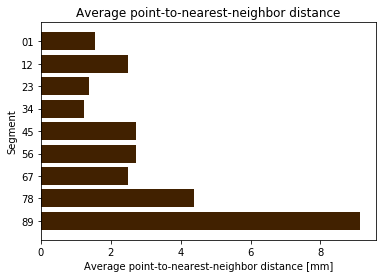

In [31]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
ax.barh(y_pos, average_distances, color=bar_color)
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_ylabel('Segment')
ax.set_title('Average point-to-nearest-neighbor distance')
plt.show()

Run the cell below if you want to save the plot as a PNG.

In [37]:
plt.savefig('./results/pt_to_nearest_neighbor_dist_avgs.png', dpi=resolution_dpi)

### Visualize average distances across segments, scaled for each segment's max diameter.

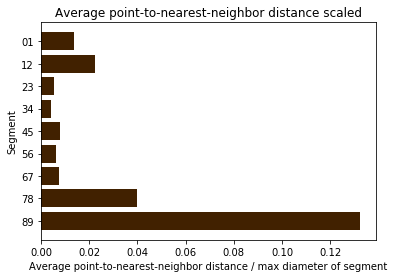

In [38]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
average_distances_scaled = [dist/dia for dist, dia in zip(average_distances, max_diameters)]
ax.barh(y_pos, average_distances_scaled, color=bar_color)
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Average point-to-nearest-neighbor distance / max diameter of segment')
ax.set_ylabel('Segment')
ax.set_title('Average point-to-nearest-neighbor distance scaled')
plt.show()

Run the cell below if you want to save the plot as a PNG.

In [39]:
plt.savefig('./results/pt_to_nearest_neighbor_dist_avgs_scaled.png', dpi=resolution_dpi)

### Visualize the spread of distances across segments

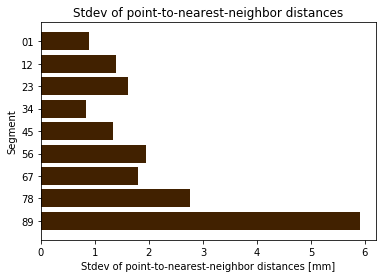

In [34]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segments))
ax.barh(y_pos, stdev_distances, color=bar_color)
ax.set_yticks(y_pos)
ax.set_yticklabels(segments)
ax.invert_yaxis()
ax.set_xlabel('Stdev of point-to-nearest-neighbor distances [mm]')
ax.set_ylabel('Segment')
ax.set_title('Stdev of point-to-nearest-neighbor distances')
plt.show()

Run the cell below if you want to save the plot as a PNG.

In [40]:
plt.savefig('./results/pt_to_nearest_neighbor_dist_avgs_stds.png', dpi=resolution_dpi)